<a href="https://colab.research.google.com/github/threegenie/sentiment_project/blob/main/sentiment_project_using_okt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install konlpy

     |████████████████████████████████| 19.4MB 1.5MB/s 
     |████████████████████████████████| 92kB 13.1MB/s 
     |████████████████████████████████| 460kB 50.4MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,229 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and d

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
#mpl.font_manager._rebuild()

# https://pinkwink.kr/1255 / https://teddylee777.github.io/colab/colab-korean 한글 문제 대응 참고

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
# 오류(SettingWithCopyError 발생)
pd.set_option('mode.chained_assignment', 'raise') # SettingWithCopyError

# 경고(SettingWithCopyWarning 발생, 기본 값입니다)
pd.set_option('mode.chained_assignment', 'warn') # SettingWithCopyWarning

# 무시
pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다

In [8]:
df = pd.read_table('review.txt', names=['ratings', 'reviews'])
df

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
40386,5,"설치도 빠르고, 기사님 두분도 친절하고 설명도 잘해주시고 뒷정리도 깔끔하게 해주셔서..."
40387,5,멋지다~!!!!!!!!1
40388,5,가격대비 나름 사용하기 편합니다
40389,4,좋은 제품은 맞는듯 하지만 아주 심한 건성인 저에겐 그저그런 보습제네요..


#### 중복 데이터가 있다면 제거

In [9]:
df.drop_duplicates('reviews',keep='first')
df.shape

(40391, 2)

#### 훈련, 테스트셋 분리

In [10]:
train, val = train_test_split(df, test_size = 0.2, random_state = 11)
train.shape, val.shape

((32312, 2), (8079, 2))

In [11]:
val, test = train_test_split(val, test_size = 0.5, random_state = 11)
val.shape, test.shape

((4039, 2), (4040, 2))

#### 별점으로 라벨링 : 별점이 4을 넘으면 긍정 리뷰, 이하는 부정 리뷰로 분류

In [12]:
def star_evaluate(rating):
  if rating >=4:
    return 1
  else:
    return 0
  
train['label'] = train['ratings'].apply(star_evaluate)
val['label'] = val['ratings'].apply(star_evaluate)
train

,ratings,reviews,label
9529,1,진짜가방을 쨥처럽 보이게하네요. 이건 환불불가이니. 강매같은 느낌,0
28910,1,흰색인줄 알앗더니 아이보리색깔이네요 아쉬워요,0
25065,2,그냥 저렴해보이네요.. 특히 압축봉은 최악,0
28446,2,재구매 솔직히 이번 살치살은 질기고 실망이였어요,0
24724,1,사이즈는 딱 맞는데 깨져서 욌어요.,0
...,...,...,...
32081,5,아이폰 잘쓰고 있는데 베터리가 나가서 구매했습니다~ 양면테이프가 중간에 끊어져서 베...,1
7259,1,마감이 허술합니다 사포가없어서 우선 태잎붙여놨어요 모서리가 날카롭도 조금 깨진부분도...,0
21584,2,네조아요. 필요해서 샀어요,0
36543,5,발열 엄청 오래 지속되고 냄새도 없고 만족합니다,1


In [13]:
train['label'].value_counts()

0    16362
1    15950
Name: label, dtype: int64

#### 데이터 정제 - 훈련, 테스트셋에 모두 적용 -> 정규표현식 사용하여 한글 제외 모두 제거

In [14]:
train['reviews'] = train['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train['reviews'].replace('', np.nan, inplace=True)
train.head()

,ratings,reviews,label
9529,1,진짜가방을 쨥처럽 보이게하네요 이건 환불불가이니 강매같은 느낌,0
28910,1,흰색인줄 알앗더니 아이보리색깔이네요 아쉬워요,0
25065,2,그냥 저렴해보이네요 특히 압축봉은 최악,0
28446,2,재구매 솔직히 이번 살치살은 질기고 실망이였어요,0
24724,1,사이즈는 딱 맞는데 깨져서 욌어요,0


In [15]:
val['reviews'] = val['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
val['reviews'].replace('', np.nan, inplace=True)
val.head()

,ratings,reviews,label
36554,2,배송짱오래걸림,0
20027,1,확장되서 좋다고해서샀는데 확장은되는데 그안에 물건을 넣지못하면 왜 확장이되는건지 댓...,0
34644,2,공용인데 남자가 입긴 너무나 짧아요,0
18943,1,스크래치있는 제품 보내시고 박스버리고 스티커 떼고 난 후에도 안보였는데 설거지할 때...,0
33943,1,별 한개도 아까워요,0


In [16]:
test['reviews'] = test['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test['reviews'].replace('', np.nan, inplace=True)
test.head()

,ratings,reviews
6544,2,음사용감이 불편한 것 빼고는 다 좋아요
629,5,이쁘네여으ㅅ
20764,2,좋긴좋은데 무게도무겁고 근데 좀 위험합니다 마무리가 날카로워서 다칠우려가 매우커요
1152,5,굿 이지마는 구들장이 없습니다 애들이 너무 덥대요 있습니다 너무 좋아해요 빠른 배송...
25813,5,전늘 삼다수만 주문해서 꾸준히 잘 먹고있습니다


#### 토큰화 - Mecab 사용

In [17]:
from konlpy.tag import Okt
okt = Okt()

In [18]:
stopwords = ['요', '도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [19]:
train['tokenized'] = train['reviews'].apply(okt.morphs)
train['tokenized'] = train['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [20]:
val['tokenized'] = val['reviews'].apply(okt.morphs)
val['tokenized'] = val['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [21]:
test['tokenized'] = test['reviews'].apply(okt.morphs)
test['tokenized'] = test['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [22]:
train.head()

,ratings,reviews,label,tokenized
9529,1,진짜가방을 쨥처럽 보이게하네요 이건 환불불가이니 강매같은 느낌,0,"[진짜, 가방, 쨥처럽, 보이, 하네요, 이건, 환불, 불가, 이니, 강매, 같은,..."
28910,1,흰색인줄 알앗더니 아이보리색깔이네요 아쉬워요,0,"[흰색, 줄, 알앗더니, 아이보리, 색깔, 이네, 아쉬워요]"
25065,2,그냥 저렴해보이네요 특히 압축봉은 최악,0,"[그냥, 저렴, 해보이네요, 특히, 압축, 봉, 최악]"
28446,2,재구매 솔직히 이번 살치살은 질기고 실망이였어요,0,"[재구매, 솔직히, 이번, 살치, 살, 질, 기고, 실망, 였어요]"
24724,1,사이즈는 딱 맞는데 깨져서 욌어요,0,"[사이즈, 딱, 맞는데, 깨져서, 욌어요]"


#### 단어 빈도에 따른 시각화 - Counter, Wordcloud 패키지 이용

In [23]:
negative_words = np.hstack(train[train.label == 0]['tokenized'].values)
positive_words = np.hstack(train[train.label == 1]['tokenized'].values)

In [24]:
nw = Counter(negative_words)
print(nw.most_common(20))

[('너무', 2807), ('안', 2558), ('배송', 2027), ('그냥', 1892), ('잘', 1718), ('로', 1313), ('별로', 1217), ('했는데', 1194), ('으로', 1181), ('못', 1130), ('제품', 1113), ('생각', 1093), ('ㅠㅠ', 1065), ('좀', 1053), ('하고', 1048), ('사용', 1019), ('구매', 1004), ('보다', 994), ('ㅠ', 871), ('맛', 865)]


In [25]:
nwc = nw.most_common(15)

In [26]:
! pip install wordcloud

{'너무': 2807, '안': 2558, '배송': 2027, '그냥': 1892, '잘': 1718, '로': 1313, '별로': 1217, '했는데': 1194, '으로': 1181, '못': 1130, '제품': 1113, '생각': 1093, 'ㅠㅠ': 1065, '좀': 1053, '하고': 1048}


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


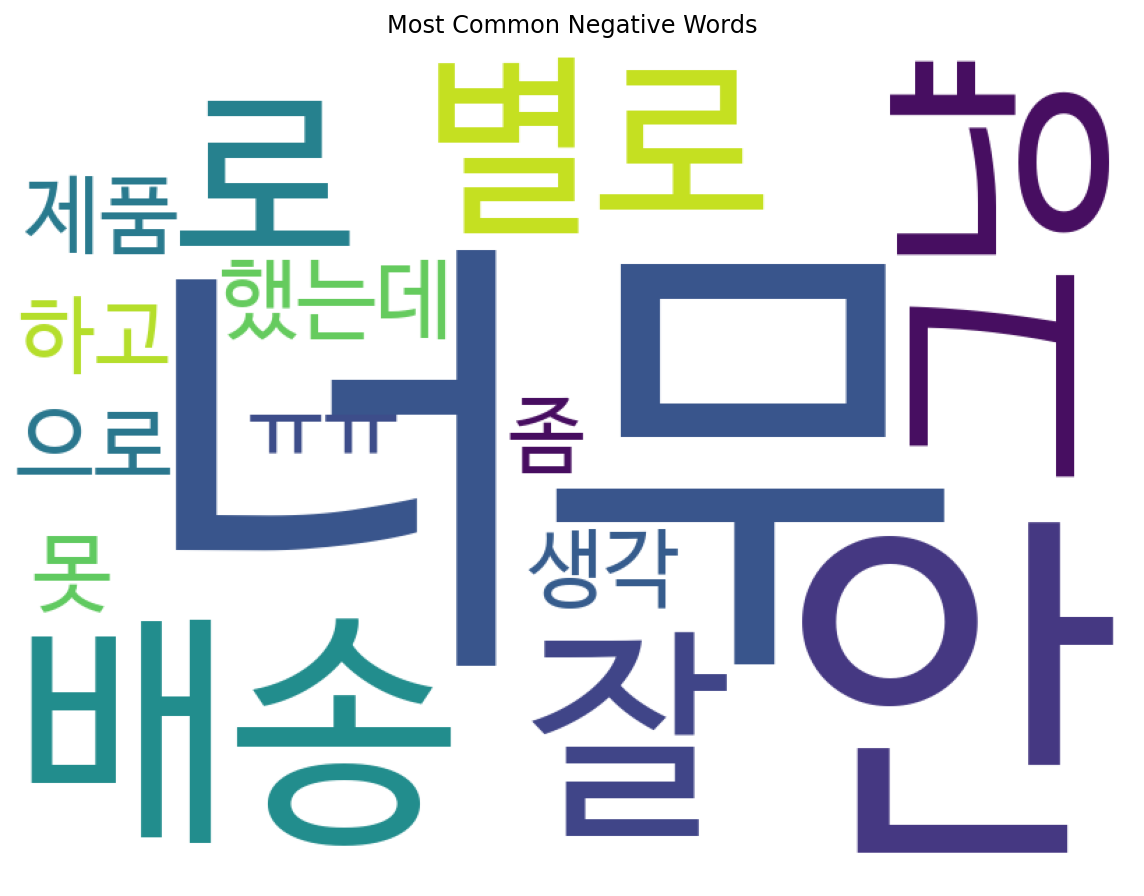

In [27]:
from wordcloud import WordCloud

#wordCloud생성
#한글꺠지는 문제 해결하기위해 font_path 지정
negative_word_cloud = WordCloud(font_path=fontpath, 
               background_color='white', width=800, height=600)
print(dict(nwc))
cloud = negative_word_cloud.generate_from_frequencies(dict(nwc))
plt.figure(figsize=(10, 8))
plt.title('Most Common Negative Words')
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [28]:
pw = Counter(positive_words)
print(pw.most_common(20))

[('잘', 3249), ('좋아요', 3009), ('배송', 2621), ('너무', 1921), ('재구매', 1812), ('구매', 1527), ('사용', 1150), ('가격', 1062), ('로', 994), ('같아요', 957), ('으로', 919), ('좋네요', 881), ('제품', 875), ('보다', 865), ('빠르고', 850), ('입니다', 807), ('주문', 797), ('생각', 753), ('더', 736), ('했는데', 729)]


In [29]:
pwc = pw.most_common(15)

{'잘': 3249, '좋아요': 3009, '배송': 2621, '너무': 1921, '재구매': 1812, '구매': 1527, '사용': 1150, '가격': 1062, '로': 994, '같아요': 957, '으로': 919, '좋네요': 881, '제품': 875, '보다': 865, '빠르고': 850}


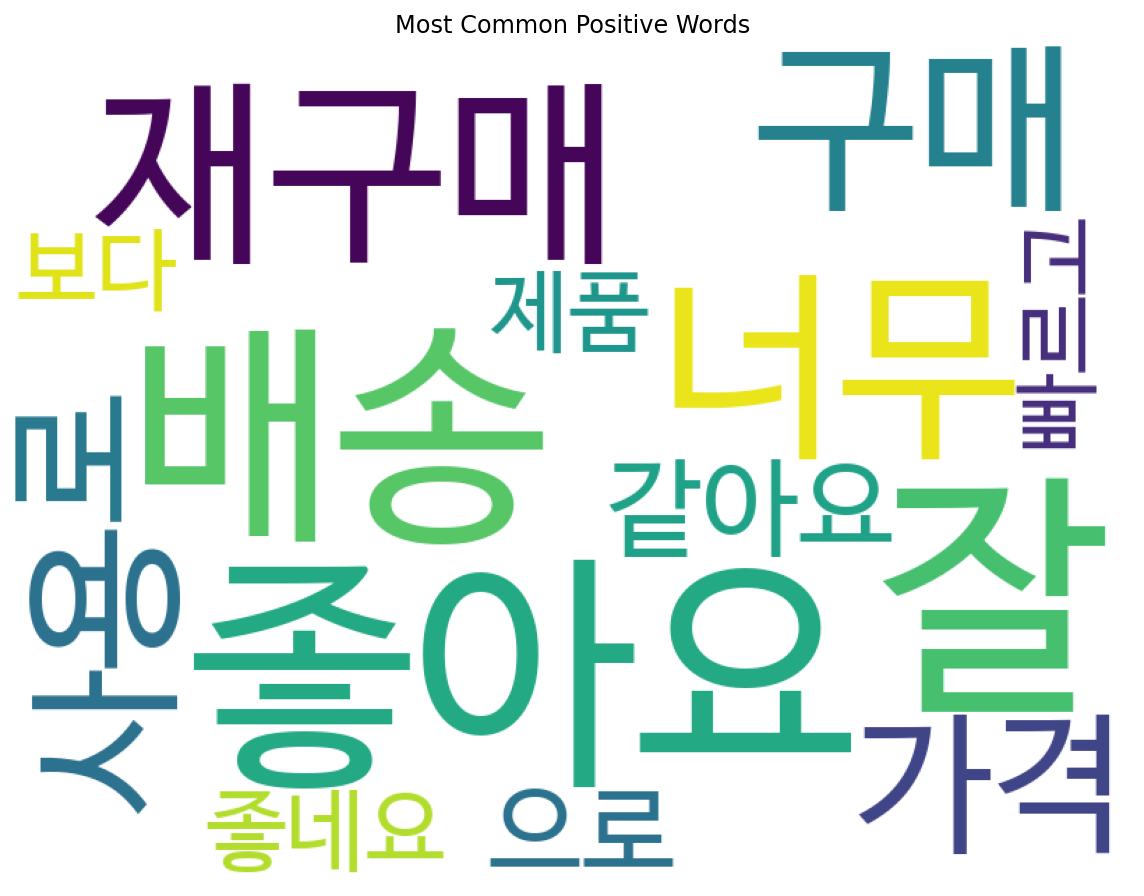

In [30]:
positive_word_cloud = WordCloud(font_path=fontpath, 
               background_color='white', width=800, height=600)
print(dict(pwc))
cloud = positive_word_cloud.generate_from_frequencies(dict(pwc))
plt.figure(figsize=(10, 8))
plt.title('Most Common Positive Words')
plt.axis('off')
plt.imshow(cloud)
plt.show()

#### 데이터에 정수 인코딩

In [31]:
X_train = train['tokenized'].values
y_train = train['label'].values
X_val= val['tokenized'].values
y_val = val['label'].values
X_test = test['tokenized'].values

In [32]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train)

In [33]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)



단어 집합(vocabulary)의 크기 : 4
등장 빈도가 1번 이하인 희귀 단어의 수: 4
단어 집합에서 희귀 단어의 비율: 100.0
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 100.0


In [34]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 2


In [35]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_val= tokenizer.texts_to_sequences(X_val)
X_test = tokenizer.texts_to_sequences(X_test)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


리뷰의 최대 길이 : 54
리뷰의 평균 길이 : 12.399015845506314


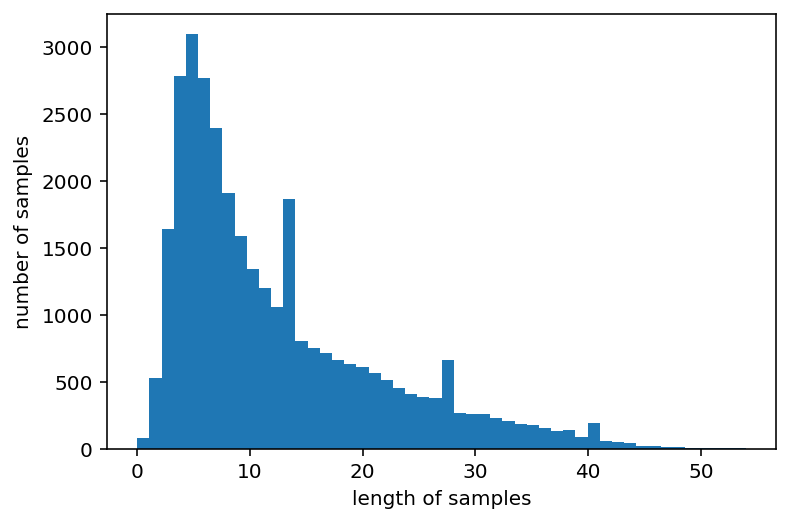

In [36]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [37]:
max_len = 80 #Padding 80으로
X_train = pad_sequences(X_train, maxlen = max_len)
X_val = pad_sequences(X_val, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

#### GRU 모델을 이용한 감성 분석

In [38]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [39]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         200       
_________________________________________________________________
gru (GRU)                    (None, 128)               88320     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 88,649
Trainable params: 88,649
Non-trainable params: 0
_________________________________________________________________


In [41]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [42]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
431/431 [==============================] - 12s 10ms/step - loss: 0.6786 - acc: 0.5773 - val_loss: 0.6806 - val_acc: 0.5621

Epoch 00001: val_acc improved from -inf to 0.56212, saving model to best_model.h5
Epoch 2/15
431/431 [==============================] - 4s 8ms/step - loss: 0.6756 - acc: 0.5809 - val_loss: 0.6774 - val_acc: 0.5708

Epoch 00002: val_acc improved from 0.56212 to 0.57079, saving model to best_model.h5
Epoch 3/15
431/431 [==============================] - 4s 8ms/step - loss: 0.6746 - acc: 0.5805 - val_loss: 0.6824 - val_acc: 0.5759

Epoch 00003: val_acc improved from 0.57079 to 0.57589, saving model to best_model.h5
Epoch 4/15
431/431 [==============================] - 4s 8ms/step - loss: 0.6744 - acc: 0.5843 - val_loss: 0.6774 - val_acc: 0.5759

Epoch 00004: val_acc did not improve from 0.57589
Epoch 5/15
431/431 [==============================] - 4s 8ms/step - loss: 0.6741 - acc: 0.5834 - val_loss: 0.6773 - val_acc: 0.5756

Epoch 00005: val_acc did not im

#### BiLSTM 모델을 이용한 감성 분석

In [43]:
from tensorflow.keras.layers import LSTM, Bidirectional

model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, 100))
model_lstm.add(Bidirectional(LSTM(100)))
model_lstm.add(Dense(1, activation='sigmoid'))

In [44]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         200       
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 161,201
Trainable params: 161,201
Non-trainable params: 0
_________________________________________________________________


In [45]:
es_lstm = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc_lstm = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [46]:
model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=256, validation_split=0.2)

Epoch 1/15
101/101 [==============================] - 2s 18ms/step - loss: 0.6727 - acc: 0.5867 - val_loss: 0.6765 - val_acc: 0.5762

Epoch 00001: val_acc did not improve from 0.57620
Epoch 2/15
101/101 [==============================] - 1s 14ms/step - loss: 0.6725 - acc: 0.5857 - val_loss: 0.6781 - val_acc: 0.5756

Epoch 00002: val_acc did not improve from 0.57620
Epoch 3/15
101/101 [==============================] - 1s 14ms/step - loss: 0.6725 - acc: 0.5845 - val_loss: 0.6777 - val_acc: 0.5762

Epoch 00003: val_acc did not improve from 0.57620
Epoch 4/15
101/101 [==============================] - 1s 14ms/step - loss: 0.6725 - acc: 0.5849 - val_loss: 0.6767 - val_acc: 0.5716

Epoch 00004: val_acc did not improve from 0.57620
Epoch 5/15
101/101 [==============================] - 1s 14ms/step - loss: 0.6727 - acc: 0.5855 - val_loss: 0.6768 - val_acc: 0.5716

Epoch 00005: val_acc did not improve from 0.57620
Epoch 00005: early stopping


In [47]:
y_pred = model_lstm.predict(X_test)

In [48]:
test['label'] = test['ratings'].apply(star_evaluate)

In [ ]:
test['tokenized'] = test['reviews'].apply(okt.morphs)
test['tokenized'] = test['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [63]:
def sentiment_predict(df):
  df = okt.morphs(df) # 토큰화
  df = [word for word in df if not word in stopwords]
  encoded = tokenizer.texts_to_sequences(df)
  pad_new = pad_sequences(encoded, maxlen = max_len) 
  score = float(model_lstm.predict(pad_new))
  if score > 0.5:
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [54]:
X_test

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int32)

In [64]:
prediction = test.copy()
prediction['predicted'] = test['reviews'].apply(sentiment_predict)

TypeError: ignored

In [50]:
prediction

,label,predicted_label
6544,0,0.502066
629,1,0.501829
20764,0,0.503615
1152,1,0.504284
25813,1,0.502627
...,...,...
5701,1,0.501645
7083,1,0.501830
1940,0,0.504085
20864,0,0.504530
